<a href="https://colab.research.google.com/github/jsAiyaya/JSC270_Data_Science_1/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: DELVE COVID data 

## Learning objectives: 

1.   Understanding the DELVE COVID-19 dataset and how it is displayed in the current notebook
2.   Modifying code to update figures
3.   Reading in, wrangling, and plotting data on your own!

# Part I: DELVE COVID-19 Data Visualization (20 pts)

###Go to https://rs-delve.github.io/data_software/global-dataset.html and read about the DELVE Global COVID-19 Dataset. 

###Open the python notebook which was used to produce the data exploration on the DELVE website ([here](https://colab.research.google.com/github/rs-delve/covid19_datasets/blob/master/Data_Exploration.ipynb)) and review the code that was used. 

###Now read the DELVE data into colab
####Hint: double clicking on the code cells in the DELVE colab, it will show you the code (i.e. the notebook is set to hide the code), you can copy that cell's content and paste it in the code cell below

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output, display
import ipywidgets as widgets
from datetime import datetime, date, timedelta

path = 'https://raw.githubusercontent.com/rs-delve/covid19_datasets/master/dataset/combined_dataset_latest.csv'
df = pd.read_csv(path, parse_dates=['DATE'])

###Explore the columns of the dataframe using .describe()

In [ ]:
df.describe()

,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
count,138748.000000,138724.000000,138761.000000,138634.000000,138686.000000,138684.000000,138714.000000,138721.000000,138574.000000,138377.000000,1.062880e+05,1.063700e+05,138646.000000,138545.00000,138187.000000,1.062450e+05,1.322290e+05,138641.000000,141546.000000,1.247220e+05,1.246570e+05,115093.000000,115058.000000,124722.000000,124657.000000,115093.000000,115058.000000,7.572700e+04,7.363900e+04,75727.000000,73639.000000,7.651300e+04,76513.000000,1.257420e+05,123653.000000,120201.000000,119465.000000,125742.000000,125742.000000,0.0,0.0,0.0,91476.000000,91490.000000,91103.000000,91937.000000,92076.000000,91611.000000,46128.000000,20088.000000,46128.000000,119477.000000,107301.000000,9.055900e+04,1.240430e+05,3924.000000,564.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000,37515.000000
mean,1.538033,1.374708,1.343829,2.566138,0.530364,0.991037,0.790958,2.367709,0.782239,0.876490,1.430008e+08,8.488716e+06,1.797881,1.93906,1.284252,7.975346e+06,6.020802e+05,50.710365,1.552824,6.727213e+05,2.972433e+03,15595.799093,48.741826,24822.841989,130.796645,459.222769,1.560843,1.501761e+07,5.730526e+04,630.522623,2.569546,6.097632e+04,2.742757,4.480133e+07,477.369334,30.567815,20169.750404,343.757941,292.432863,NaN,NaN,NaN,-12.709126,8.743087,7.664819,-18.305557,-17.266421,6.681206,112.610801,88.809425,112.108196,2.962038,21.803546,1.540574e+07,6.976019e+06,117.939596,818.808852,0.000036,0.011382,188.931462,19.297962,15.604800,23.355435,3.494217
std,1.134381,0.975989,0.788712,1.536976,0.685080,0.929732,0.897352,1.228020,0.767677,0.857548,1.113385e+10,2.560672e+09,0.547364,0.98085,0.782511,9.234216e+08,6.218630e+07,24.040304,1.322656,3.104789e+06,1.836934e+04,59473.122243,204.481815,41404.707081,501.853097,738.386634,4.100665,5.623917e+07,1.999221e+05,1526.556936,7.860154,1.938554e+05,7.051692,1.573885e+08,2274.980381,9.295469,21340.963853,204.163625,231.934193,NaN,NaN,NaN,28.781630,32.992614,51.918231,29.138093,20.694648,8.819687,60.695662,46.357920,77.261631,2.484911,9.825280,4.529270e+07,2.101725e+07,249.098170,1742.175371,0.000068,0.005347,64.843807,9.014941,9.367133,9.206467,1.834309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e-02,-2.000000e-02,0.000000,0.00000,0.000000,-1.000000e-02,-7.000000e-02,0.000000,0.000000,1.000000e+00,-7.434700e+04,1.000000,-1918.000000,0.001000,-3125.829000,0.001000,-75.911000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,3.401000e+04,0.137000,15.100000,661.240000,-192.000000,-738.000000,NaN,NaN,NaN,-100.000000,-100.000000,-100.000000,-1

###Now create a new dataframe summarizing average values for each country in each column and display it in the notebook



In [ ]:
df_avg_country = df.groupby("country_name").mean()
df_avg_country

,npi_school_closing,npi_workplace_closing,npi_cancel_public_events,npi_gatherings_restrictions,npi_close_public_transport,npi_stay_at_home,npi_internal_movement_restrictions,npi_international_travel_controls,npi_income_support,npi_debt_relief,npi_fiscal_measures,npi_international_support,npi_public_information,npi_testing_policy,npi_contact_tracing,npi_healthcare_investment,npi_vaccine_investment,npi_stringency_index,npi_masks,cases_total,cases_new,deaths_total,deaths_new,cases_total_per_million,cases_new_per_million,deaths_total_per_million,deaths_new_per_million,tests_total,tests_new,tests_total_per_thousand,tests_new_per_thousand,tests_new_smoothed,tests_new_smoothed_per_thousand,stats_population,stats_population_density,stats_median_age,stats_gdp_per_capita,cases_days_since_first,deaths_days_since_first,metro_area,iso_3166_2_code,census_fips_code,mobility_retail_recreation,mobility_grocery_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,mobility_travel_driving,mobility_travel_transit,mobility_travel_walking,stats_hospital_beds_per_1000,stats_smoking,stats_population_urban,stats_population_school_age,deaths_excess_daily_avg,deaths_excess_weekly,weather_precipitation_mean,weather_humidity_mean,weather_sw_radiation_mean,weather_temperature_mean,weather_temperature_min,weather_temperature_max,weather_wind_speed_mean
country_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.373819,1.442645,1.143050,0.945946,0.662162,0.475676,0.499325,1.630229,0.000000,0.043972,0.000000e+00,260068.259386,1.020243,1.620783,0.526749,424876.706485,1.632948e+05,34.883135,0.000000,74551.577904,228.456091,3376.752212,10.921829,1871.489320,5.735004,84.767546,0.274130,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0,54.422,18.6,1803.987,352.5,324.5,NaN,NaN,NaN,26.691589,53.415888,11.170915,-14.825301,-8.934033,1.682159,NaN,NaN,NaN,0.39,NaN,4221532.0,9292896.0,NaN,NaN,0.000021,0.005995,185.438330,13.614276,7.350657,19.730927,2.427583
Albania,1.727882,1.344504,1.573727,3.176944,0.356568,1.581769,0.374833,1.651475,0.950402,1.068365,9.231948e+05,0.000000,1.593834,1.848525,1.325301,45375.218150,1.037594e+04,51.914692,0.000000,88926.838150,367.765557,1528.127536,4.824638,30953.317454,128.010452,531.904826,1.679249,5.155760e+05,2213.726885,179.459765,0.770542,2223.390805,0.773912,2872934.0,104.871,38.0,11803.431,339.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.917272,NaN,157.522419,2.89,29.2,NaN,302886.0,NaN,NaN,0.000031,0.007237,179.588922,13.379447,8.698013,18.531704,2.181171
Algeria,1.361673,1.495277,1.499325,3.365722,1.264507,1.597841,1.017544,2.832659,0.406208,1.205128,1.280026e+06,0.000000,1.773279,1.315789,1.425101,583184.257603,2.300720e+06,59.411822,2.455979,105524.093617,353.631206,3087.850508,9.513788,2365.129397,7.925984,69.208525,0.213208,NaN,NaN,NaN,NaN,NaN,NaN,44616626.0,17.348,29.1,13913.839,352.0,336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.90,18.8,2767661.0,7766182.0,NaN,NaN,0.000014,0.008208,193.742416,17.430347,12.708320,22.455916,3.471161
Andorra,1.159420,1.588933,1.358366,2.839262,0.859025,0.226614,0.056653,1.607378,1.810277,1.283267,7.608472e+05,817787.780656,1.602108,2.367589,1.610013,4520.319828,0.000000e+00,44.888116,2.574244,9481.486409,50.939828,94.639175,0.213549,122572.671222,658.528691,1223.455513,2.760719,1.843159e+05,NaN,2382.759031,NaN,460.615385,5.954595,77354.0,163.755,NaN,NaN,349.0,329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.8,NaN,NaN,NaN,NaN,0.000030,0.006175,177.429576,6.740901,1.786306,11.818287,1.703644
Angola,1.255348,1.719251,1.347594,2.995989,0.871658,1.084225,1.485294,2.858289,0.159517,0.256267,1.570681e+04,0.000000,1.662651,2.045455,0.073770,419580.419580,1.178046e+05,58.348583,1.660972,27629.726872,143.989721,683.133929,2.818452,814.228916,4.243263,20.131482,0.082948,1.336591e+06,3949.200000,39.388286,0.116400,3650.857143,0.107714,33933611.0,23.890,16.8,5819.495,340.0,331.0,NaN,NaN,NaN,6.773876,15.724719,27.672489,-7.29839

###Copy the code which generates the "Timeline of NPI Introduction for Selected Countries" graph and comment each command describing what was done, e.g.:



```
## add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
```



###Next, change the colors on the graph to group NPIs with the same color in the following way: 
* all canceling/closures (e.g. "npi_cancel_public_events", "npi_school_closing","npi_close_public_transport", "npi_workplace_closing")
* all money-related interventions (e.g. "npi_income_support")
* all testing and PPE interventions (e.g. "npi_contact_tracing", "npi_masks")
* remaining NPIs (e.g. "npi_internal_movement_restrict")

######Hint: create a new column in plot_df that you can use for the 'hue' argument in the sns.relplot function

###Comment the code you added to make this change

### You can include your comments and change in the cell below.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


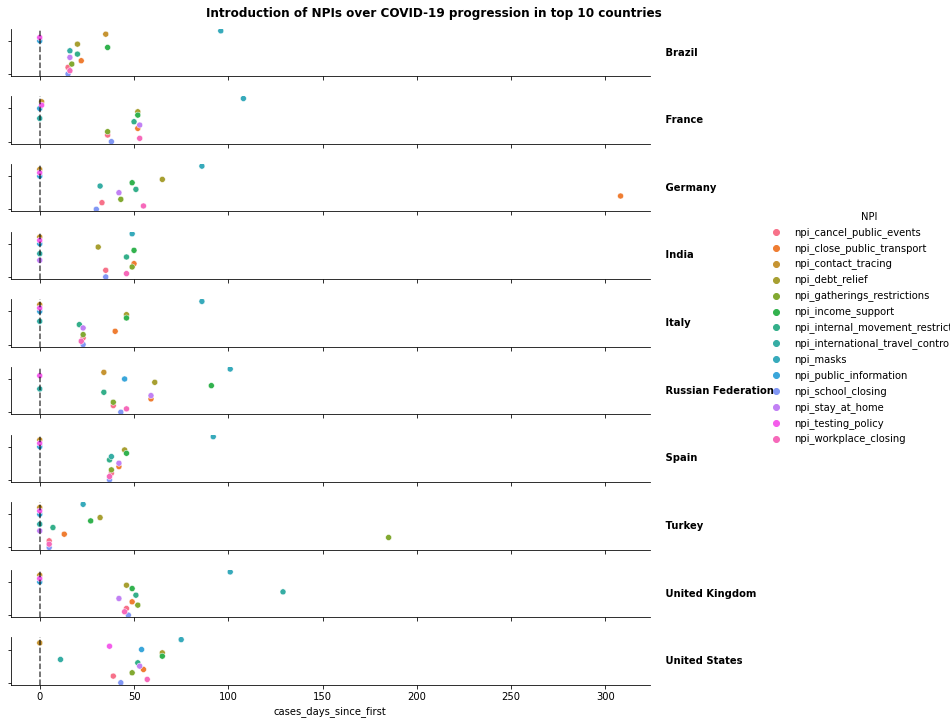

In [ ]:
# create a list called npis containg 14 Non-Pharmaceutical Interventions(NPIs)
npis = [
        'npi_school_closing',
        'npi_workplace_closing',
        'npi_cancel_public_events',
        'npi_gatherings_restrictions',
        'npi_close_public_transport',
        'npi_stay_at_home',
        'npi_internal_movement_restrictions',
        'npi_international_travel_controls',
        'npi_income_support',
        'npi_debt_relief',
        'npi_public_information',
        'npi_testing_policy',
        'npi_contact_tracing',
        'npi_masks',
]

# Get an Index instance containing a list of 10 countries whose total(cumulative) confirmed cases is among the top 10 highest
# (Here, since cases_total denotes total(cumulative) confirmed cases, max() would get the most recent data on total(cumulative) confirmed cases)
countries = df.groupby('country_name').cases_total.max().nlargest(10).index

# select columns whose column name is 'country_name' or 'cases_days_since_first' or in the list npis and select rows whose value for country_name
# is in list countries
# massage the dataframe so that all column names in npis become values for a new column called "NPI" and the value for previous columns become values
# for a new column value while using 'country_name' and 'cases_days_since_first' as identifier variables
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')

# sort the data by 'country_name' and 'cases_days_since_first' in ascending order by default
# (firstly sort by 'country_name' and when there is a tie, sort by 'cases_days_since_first')
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])

# for each (country_name, NPI) pair, get the number of days since the first recorded case in the country when a certain NPI is first carried out
# (select rows where value for 'value' is greater than 0 which means there is such NPI policy and get the minimum value of 'cases_days_since_first'
# and 'value' separately
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()

# add a column to plot_df which replaces the npi name with its enumerated index value
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

# make a plot with 'cases_days_since_first' as the x-axis and 'value' as the y-axis; colour points with different 'NPI' value differently;
# plot one facet for each country that has a value in 'country_name'; the plot is a scatter plot;
# set height of each facet to 1 inch; set aspect ratio of each facet to 10 which means 10 * 1 gives the width of each facet in inches
# set the shape of the point to circle; the titles for the row variable are drawn to the right of the last column.
# the figure size will be extended, and the legend will be drawn outside the plot on the center right.
# Remove the top and right spines from the plots
g = sns.relplot(data=plot_df, 
                x='cases_days_since_first', 
                y='value', 
                hue='NPI', 
                row='country_name', 
                kind='scatter', 
                height=1, 
                aspect=10, 
                marker='o', 
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))

# loop over all axes of overall relplot
for ax in g.axes.flat:
  # get the annotation for each axis
  print(ax.te)
  txt = ax.texts[0]
  # include text for each subplot, get country name from txt: if we split 'country_name = Brazil' by '=',
  # and get string at index 1, we will get country name; set the coordinate system;
  # set vertical alignment to center; set the text to bold type
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
          txt.get_text().split('=')[1],
          transform=ax.transAxes,
          va='center',
          fontweight='bold')
  # since we have set a new text, remove the old messy one
  ax.texts[0].remove()
  # show nothing on y label
  ax.set_ylabel(None)
  # set the yaxis' labels with list of string labels.
  ax.set_yticklabels([])
  # add a vertical dashed line, c sets the colour, alpha sets the blending
  ax.axvline(0, ls='--', c='k', alpha=0.7)

# Add a centered title to the figure.
g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

# get the legend of the FacetGrid object
leg = g._legend

# set the location of a legend and make the coordinates of lower left of bounding box to (1.05, 0.55)
leg.set_bbox_to_anchor([1.05, 0.55]) 

# set the position of the top edge of the subplots(a fraction of the figure height) to 0.95
plt.subplots_adjust(top=0.95)

# show the plot
plt.show()

Changes of the colour are shown below.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


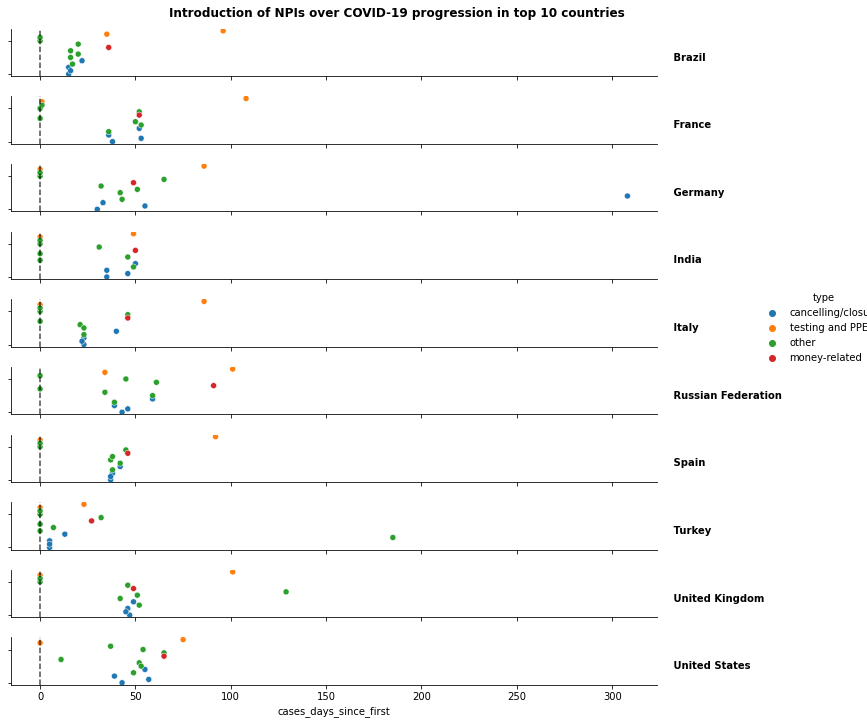

In [ ]:
import matplotlib
countries = df.groupby('country_name').cases_total.max().nlargest(10).index
plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')
plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])
plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()
plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})

# define a function called get_type that will generate corresponding value for the new column we want to add
# The function assign values for 'type' based on value of 'value'(value is directly associated with npi type)
def get_type(x):
  if x['value'] in [2, 0, 4, 1]:
    return 'cancelling/closures'
  if x['value'] == 8:
    return 'money-related'
  if x['value'] in [12, 13]:
    return 'testing and PPE'
  return 'other'

# generate a new column called type which I will use to group npis when ploting 
plot_df.loc[:, "type"] = plot_df.apply(get_type, axis = 1)

# change the hue to the new generated variable type
g = sns.relplot(data=plot_df, 
                x='cases_days_since_first', 
                y='value', 
                hue='type', 
                row='country_name', 
                kind='scatter', 
                height=1, 
                aspect=10, 
                marker='o', 
                facet_kws=dict(margin_titles=True, legend_out=True, despine=True))

for ax in g.axes.flat:
  txt = ax.texts[0]
  ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
          txt.get_text().split('=')[1],
          transform=ax.transAxes,
          va='top',
          fontweight='bold')
  ax.texts[0].remove()
  ax.set_ylabel(None)
  ax.set_yticklabels([])
  ax.axvline(0, ls='--', c='k', alpha=0.7)

g.fig.suptitle('Introduction of NPIs over COVID-19 progression in top 10 countries', fontweight='bold')

leg = g._legend
leg.set_bbox_to_anchor([1.05, 0.55]) 

plt.subplots_adjust(top=0.95)
plt.show()

###In the DELVE data exploration, they add a widget to allow the user to select only data from a specific country to display. Let's add a widget here and only show the data from one country. It's okay if your country-specific graph is simpler than the ones above (e.g. no dashed horizontal line). 

Dropdown(description='Country:', index=8, options=(('Brazil', 'Brazil'), ('France', 'France'), ('Germany', 'Ge…

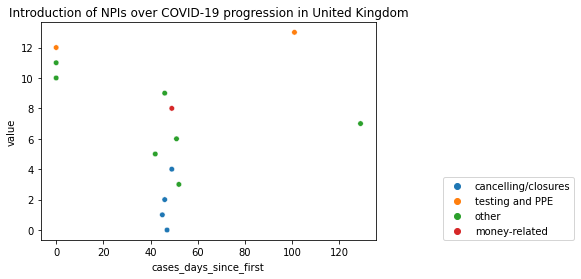

In [ ]:
countries = df.groupby('country_name').cases_total.max().nlargest(10).index
def add_widget(country):
  country_widget = widgets.Dropdown(
      options=sorted([(c, c) for c in countries]),
      value=country,
      description='Country:',
  )

  country_widget.observe(lambda d: plot_country(d['new']), 'value')
  display(country_widget)

def get_type(x):
  if x['value'] in [2, 0, 4, 1]:
    return 'cancelling/closures'
  if x['value'] == 8:
    return 'money-related'
  if x['value'] in [12, 13]:
    return 'testing and PPE'
  return 'other'

def plot_country(country):
  clear_output()
  add_widget(country)
  plot_df = df[df.country_name.isin(countries)][['country_name', 'cases_days_since_first'] + npis].melt(id_vars=['country_name', 'cases_days_since_first'], var_name='NPI')
  plot_df = plot_df.sort_values(['country_name', 'cases_days_since_first'])
  plot_df = plot_df[plot_df['value'] > 0].groupby(['country_name', 'NPI'], as_index=False).min()
  plot_df['value'] = plot_df.NPI.map({npi: i for i, npi in enumerate(npis)})
  plot_df.loc[:, "type"] = plot_df.apply(get_type, axis = 1)
  country_df = plot_df.loc[plot_df['country_name'] == country,:]

  g = sns.scatterplot(data=country_df, 
                x='cases_days_since_first', 
                y='value', 
                hue='type',  
                marker='o',
                s = 30)

  g.set(title = f'Introduction of NPIs over COVID-19 progression in {country}')
  plt.legend(loc=[1.2, 0])
  
  plt.show()

plot_country('United Kingdom')

# Part II: Create your own COVID-19 Data Visualization
* 20 pts for the code + description in this notebook
* 20 pts for the 2 pg summary

###Now find a COVID-19 dataset available online on your own.  Feel free to use whatever data you would like.  If you are having trouble finding data, you can take a look at the sources below:

* The U of T library COVID-19 data resource list: https://mdl.library.utoronto.ca/covid-19/data.

* Google open COVID-19 data repository: https://health.google.com/covid-19/open-data/raw-data.

* Ontario data catalog: https://data.ontario.ca/en/organization/health.

* Kaggle: https://www.kaggle.com. 

###Read the data into this notebook and create a figure with a widget that allows users to interact with the graph.  Also, write a caption in the notebook describing the figure you've created.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving vaccination-coverage-byAgeAndSex-overTimeDownload.csv to vaccination-coverage-byAgeAndSex-overTimeDownload.csv


In [ ]:
import io
import pandas as pd
# Note that this is a true CSV file (comma delimited)
data = pd.read_csv(io.BytesIO(uploaded['vaccination-coverage-byAgeAndSex-overTimeDownload.csv']), sep = ',')

In [ ]:
df = data.loc[data['prename'] == 'Canada']
df = df.loc[(data['age'] != 'Not reported') & (data['age'] != 'Unknown')]
df = df.loc[df['sex'] == 'All sexes']
df = df[['age','week_end','proptotal_atleast1dose', 'proptotal_fully', 'proptotal_additional']]
df = df.replace('na', np.nan)
df = df.replace('<0.01', '0.00')
df.reset_index(drop = True, inplace = True)
for col in ['proptotal_atleast1dose', 'proptotal_fully', 'proptotal_additional']:
  df[col] = df[col].astype('float64')
df['week_end'] = pd.to_datetime(df['week_end'])
df = df.query('week_end < "2022-01-16"')
df.tail()

,age,week_end,proptotal_atleast1dose,proptotal_fully,proptotal_additional
408,40–49,2022-01-15,89.95,87.45,33.59
409,50–59,2022-01-15,90.62,88.61,44.38
410,60–69,2022-01-15,94.25,92.59,58.86
411,70–79,2022-01-15,96.65,95.30,72.37
412,80+,2022-01-15,98.12,96.35,75.22


Dropdown(description='Selection:', index=2, options=(('have been fully vaccinated', 'have been fully vaccinate…

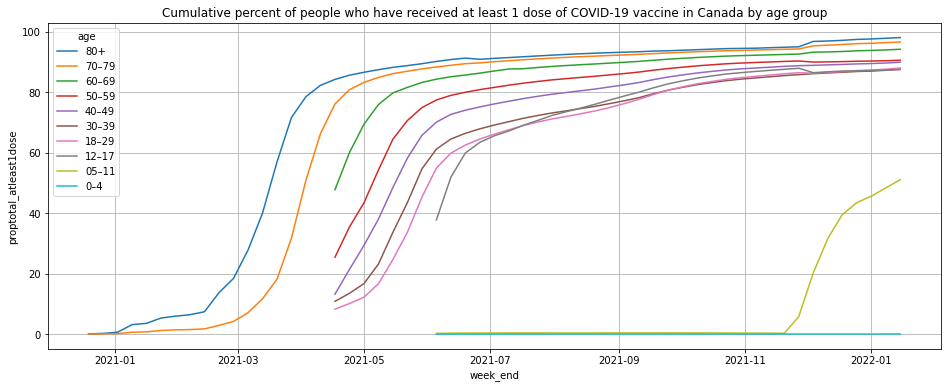

In [ ]:
doses = ['have received at least 1 dose', 'have been fully vaccinated', 'have been fully vaccinated with an additional dose']
dic = {'have received at least 1 dose': 'proptotal_atleast1dose','have been fully vaccinated':'proptotal_fully', 'have been fully vaccinated with an additional dose': 'proptotal_additional'}
def add_widget(dose):
  dose_widget = widgets.Dropdown(
      options=sorted([(c, c) for c in doses]),
      value=dose,
      description='Selection:',
  )

  dose_widget.observe(lambda d: plot_dose(d['new']), 'value')
  display(dose_widget)

def plot_dose(dose):
  clear_output()
  add_widget(dose)
  fig, ax = plt.subplots(figsize=(16, 6))

  if dose != 'have been fully vaccinated with an additional dose':
    graph = sns.lineplot(data=df, x='week_end', y=dic.get(dose), hue='age', hue_order = ['80+','70–79','60–69','50–59','40–49','30–39','18–29','12–17','05–11','0–4'])
    plt.title(f'Cumulative percent of people who {dose} of COVID-19 vaccine in Canada by age group')
  
  else:
    df1 = df.dropna()
    graph = sns.lineplot(data=df1, x='week_end', y=dict.get(dose), hue='age', hue_order = ['80+','70–79','60–69','50–59','40–49','30–39','18–29','12–17','05–11','0–4'])
    plt.xlim([pd.to_datetime('2020-12-19'), pd.to_datetime('2022-01-30')])
    plt.ylim([0,100])
    plt.title(f'Cumulative percent of people who {dose} of COVID-19 vaccine in Canada by age group')
    
  plt.grid()
  plt.show()


plot_dose('have received at least 1 dose')

### Write a 2-page, double spaced report with the following sections:
* Background: Description of the data you found
* Motivation:  Goal of your visualization 
* Methods:  A summary of the visualization you created of the data
* Conclusion: Conclusions or findings indicated by the visualization you have created 

### When you are finished, turn in this notebook and the pdf of your report to Quercus.


